<a href="https://colab.research.google.com/github/zainoor/M5_DataMining/blob/main/TugasM5_KDM_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd

items = [
    "toothpaste", "shampoo", "soap", "dishwashing liquid", "laundry detergent",
    "toilet paper", "facial tissue", "hand sanitizer", "body lotion", "deodorant",
    "instant noodles", "rice", "cooking oil", "sugar", "salt", "bread",
    "coffee", "tea", "snack chips", "bottled water"
]

frequent_combos = [
    ["toothpaste", "toothbrush"],
    ["shampoo", "soap"],
    ["rice", "cooking oil"],
    ["instant noodles", "snack chips"],
    ["toilet paper", "laundry detergent"]
]

items = list(set(items + [item for combo in frequent_combos for item in combo]))

num_transactions = 101_000
data = []

for _ in range(num_transactions):
    transaction = []

    if random.random() < 0.85:
        combo = random.choice(frequent_combos)
        transaction.extend(combo)

        if random.random() < 0.5:
            extra = random.choice(items)
            if extra not in combo:
                transaction.append(extra)
    else:
        transaction = random.sample(items, k=random.randint(1, 2))

    transaction = list(set(transaction))
    data.append(transaction)

df = pd.DataFrame(data)
df.to_csv("retail.csv", index=False, header=False)
print("File 'retail.csv' has been successfully created!")

File 'retail.csv' has been successfully created!


## **Apriori Algorithm**
---
The Apriori algorithm, introduced by R. Agrawal and R. Srikant in 1994, is a classic algorithm in data mining used for mining frequent itemsets and discovering association rules in a database. This page aims to provide an overview of the Apriori algorithm, its method, key parameters, advantages, limitations, and a basic implementation guide using Python.

The Apriori algorithm operates by identifying frequent itemsets in a dataset and then extending them to larger itemsets, provided they appear sufficiently frequently in the database. It explores the itemset space in a breadth-first manner. Initially, it identifies frequent itemsets of size 1, then uses these to generate candidate itemsets of size 2, and so on, progressively increasing the size of itemsets and checking their support.

A key principle of Apriori is that **a subset of a frequent itemset must also be frequent**. For instance, if the itemset {A, B, C} is frequent, it implies that all of its subsets, such as {A, B}, {A, C}, {B, C}, {A}, {B}, and {C}, must also be frequent. This is because any transaction containing {A, B, C} also contains all its subsets. This principle efficiently reduces the number of support calculations needed and speeds up the discovery of association rules in large datasets.

### **Key Parameters**
| **Parameter**             | **Description**                                                               |
|:--------------------------|:------------------------------------------------------------------------------|
| `min_support`             | This is the user-defined threshold (a decimal between 0 and 1) that determines the minimum frequency at which an itemset must be present in the dataset to be considered 'frequent'.|
| `confidence_threshold`    | This is the user-defined minimum level of confidence that an association rule must exceed to be considered significant.
| `lift_threshold`          | This is the user-defined minimum lift value (typically >1) focusing on rules that have a positive relationship between the antecedent and consequent.|


In [ ]:
# Install machine learning extensions (mlxtend) library
!pip install mlxtend

In [ ]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/content/retail.csv", header=None, index_col=None, names=[f"Item_{i}" for i in range(1, 21)])
df.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,dishwashing liquid,toothbrush,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,laundry detergent,toilet paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cooking oil,rice,hand sanitizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,shampoo,soap,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,laundry detergent,toilet paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 101000 transactions and each transaction has a maximum of 20 items or less.


In [ ]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,dishwashing liquid
1,1,toothbrush
2,2,laundry detergent
3,2,toilet paper
4,3,cooking oil
5,3,rice
6,3,hand sanitizer
7,4,shampoo
8,4,soap
9,4,bread


In [ ]:
# Perform one hot encoding using TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

# Create a TransactionEncoder
te = TransactionEncoder()

# Fit and transform the transaction data
te_array = te.fit(txns).transform(txns)

# Extract the column names
te_columns = te.columns_

# Create a DataFrame from the one-hot encoded array
df1 = pd.DataFrame(te_array, columns=te.columns_)

# Display the results
df1.head()

,body lotion,bottled water,bread,coffee,cooking oil,deodorant,dishwashing liquid,facial tissue,hand sanitizer,instant noodles,laundry detergent,rice,salt,shampoo,snack chips,soap,sugar,tea,toilet paper,toothbrush,toothpaste
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


The output of the above code snippet provides a binary representation of the transaction data. Each row represents a transaction, and each column corresponds to an item. If an item is present in a transaction, the corresponding cell value will be indicated as True; otherwise, it will be False. This **one-hot encoded** format is commonly used for various data mining tasks, including association rule mining. This is also the required format when using the Apriori alogrithm in identifying frequent itemsets and association rules.

In [ ]:
# Find the top most frequent items
top_items = df_txn['Item'].value_counts().reset_index()

# Convert the top items into DataFrame and sort by item count in descending order
df_top_items = pd.DataFrame(top_items)
df_top_items.columns = ['Item', 'Count']

# Calculate the percentage of transactions for each item
total_transactions = len(df)
df_top_items['% Count'] = (df_top_items['Count']*100 / total_transactions).round(2)

# Display the results
df_top_items.style.background_gradient(cmap='Blues')

,Item,Count,% Count
0,snack chips,20140,19.940000
1,instant noodles,20068,19.870000
2,rice,19965,19.770000
3,cooking oil,19876,19.680000
4,shampoo,19818,19.620000
5,toothpaste,19817,19.620000
6,soap,19807,19.610000
7,toothbrush,19795,19.600000
8,toilet paper,19711,19.520000
9,laundry detergent,19695,19.500000


Mineral water is the most frequently purchased item, and it appears in 1788 (~24%) transactions. Several food items like eggs, spaghetti, french fries, chocolate, and green tea also have high purchase counts. We can also visualize the frequent items using bar charts, heatmaps, pie charts, tree maps, word cloud to better understand their distribution within the dataset.

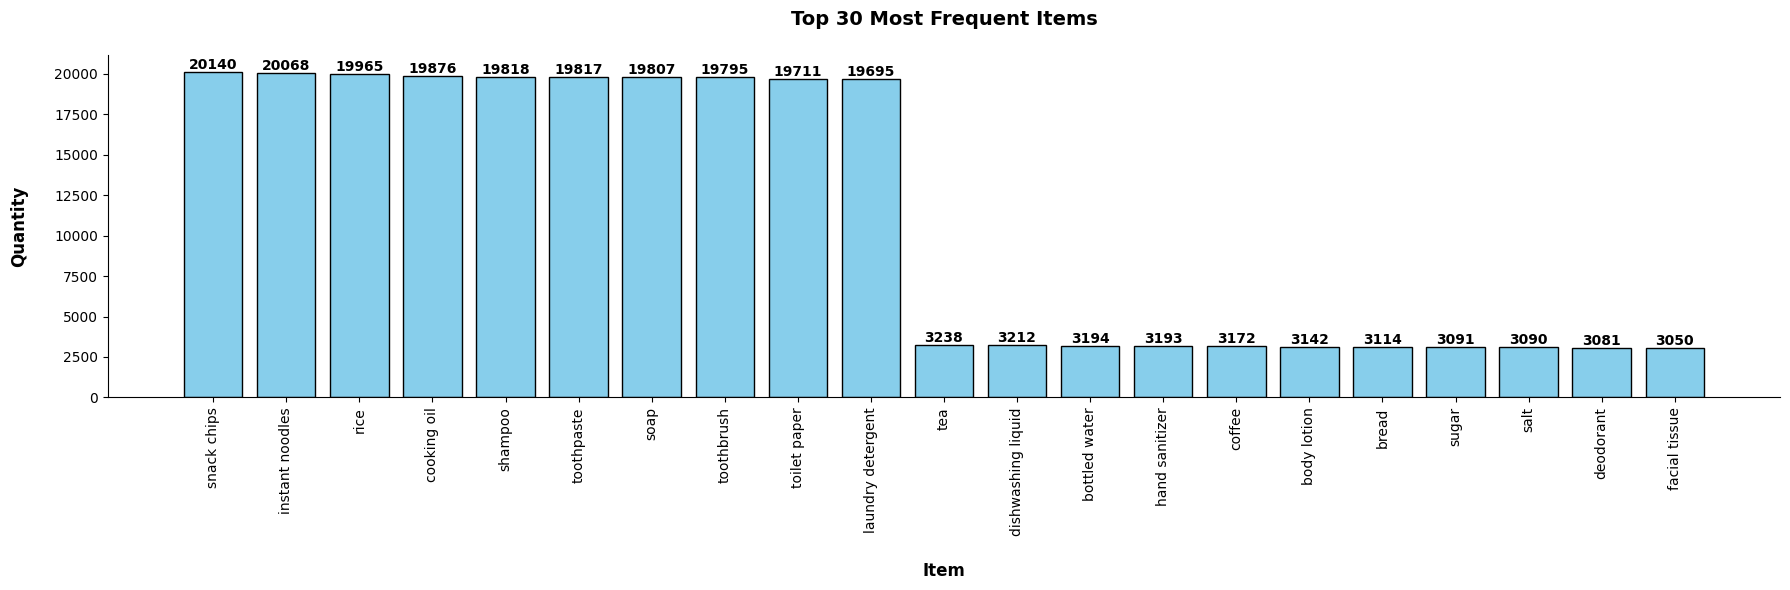

In [ ]:
# Create the countplot to display top 30 most frequent items
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 6))
plt.bar(data=df_top_items.head(30), x="Item", height="Count", edgecolor="black", color="skyblue")
ax.bar_label(ax.containers[0], fontsize=10, fontweight=600)
plt.title("Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.xlabel("\nItem", fontsize=12, fontweight=700)
plt.ylabel("Quantity\n", fontsize=12, fontweight=700)
plt.xticks(rotation=90)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().set_facecolor("white")
plt.tight_layout()
plt.show()

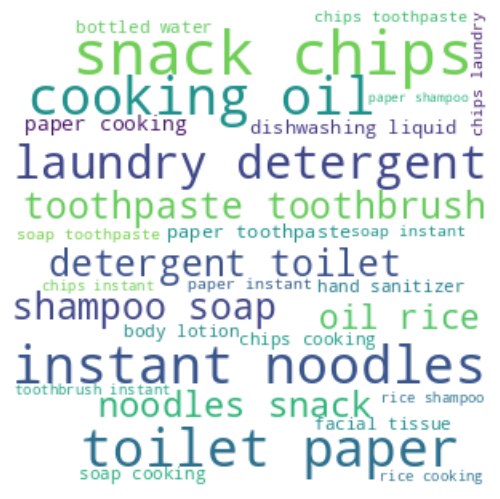

In [ ]:
# Create the word cloud to visualize frequent items
from wordcloud import WordCloud

# Combine Item values into a string with space separator
all_values = [item for txn in txns for item in txn]
all_values_list = ' '.join(all_values)

# Create a word cloud object
wordcloud = WordCloud(width=300, height=300, background_color="white", min_font_size=8, colormap='viridis').generate(all_values_list)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
!pip install squarify

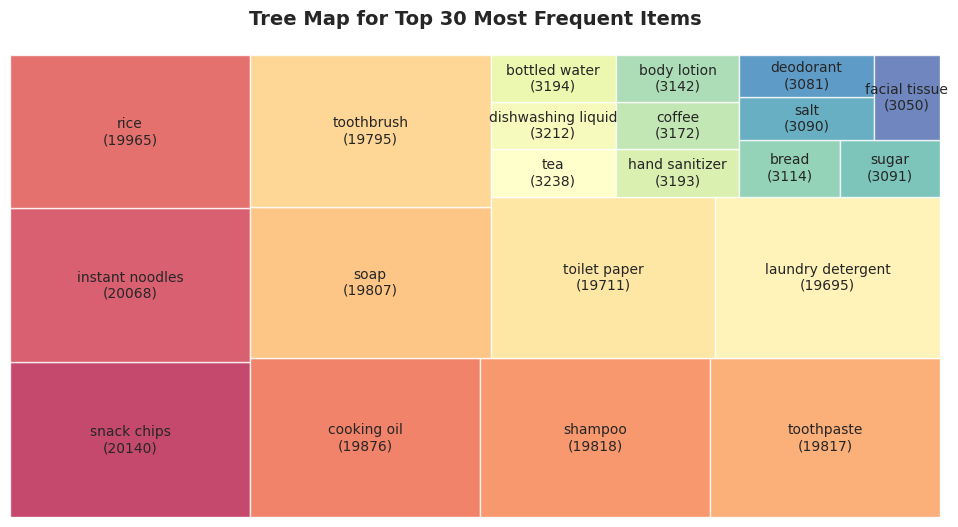

In [ ]:
# Create the tree map to display top 30 most frequent items
import seaborn as sns
sns.set_style("whitegrid")
import squarify

# Convert 'Count' column to integers
df_top_items['Count'] = df_top_items['Count'].astype(int)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Top 30 items
df_top_30items = df_top_items.head(30)

# Calculate treemap sizes
sizes = df_top_30items['Count']

# Calculate treemap labels
labels = [f"{item}\n({count})" for item, count in zip(df_top_30items['Item'], df_top_30items['Count'])]

# Plot the treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("Spectral", len(df_top_30items)), text_kwargs={'fontsize':10}, ax=ax)

plt.axis('off')
plt.title("Tree Map for Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.show()

In [ ]:
# Generate frequent itemsets
from mlxtend.frequent_patterns import apriori

# Applying Apriori algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent
min_support_threshold = 0.04
frequent_itemsets = apriori(df1, min_support=min_support_threshold, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.196792,(cooking oil)
1,0.198693,(instant noodles)
2,0.195000,(laundry detergent)
3,0.197673,(rice)
4,0.196218,(shampoo)
5,0.199406,(snack chips)
6,0.196109,(soap)
7,0.195158,(toilet paper)
8,0.195990,(toothbrush)
9,0.196208,(toothpaste)


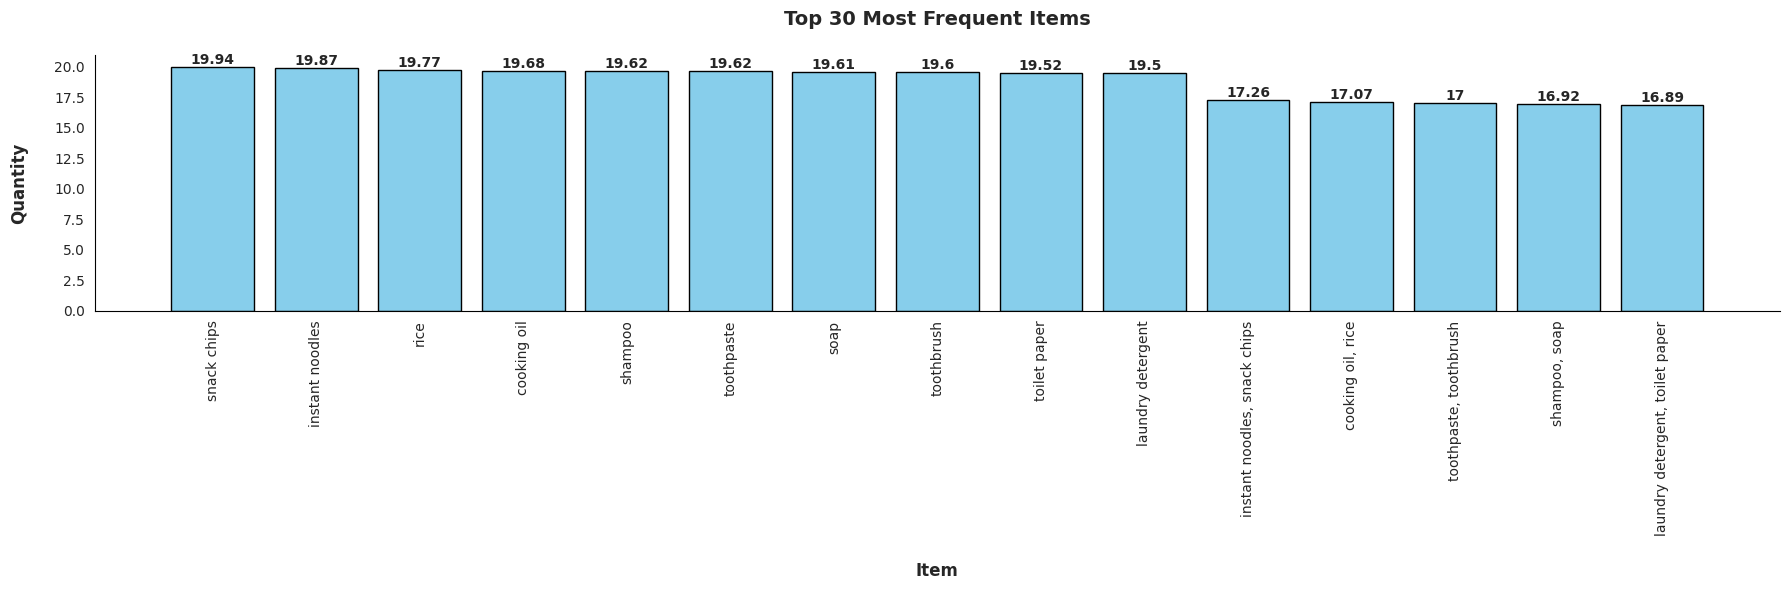

In [ ]:
# Create the countplot for top 30 most frequent itemsets
import matplotlib.pyplot as plt

# Convert frozensets to strings and remove 'frozenset' from the representation
frequent_itemsets['itemset'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Sort and filter top 15 most frequent itemsets
freq_sorted = frequent_itemsets.sort_values(by="support", ascending=False)
freq_sorted_top30 = freq_sorted.head(30)
freq_sorted_top30["support %"] = (freq_sorted_top30["support"]*100).round(2)

fig, ax = plt.subplots(figsize=(18, 6))
plt.bar(data=freq_sorted_top30, x="itemset", height="support %", edgecolor="black", color="skyblue")
ax.bar_label(ax.containers[0], fontsize=10, fontweight=600)
plt.title("Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.xlabel("\nItem", fontsize=12, fontweight=700)
plt.ylabel("Quantity\n", fontsize=12, fontweight=700)
plt.xticks(rotation=90)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().set_facecolor("white")
plt.tight_layout()
plt.show()

In [ ]:
# Generate association rules from the frequent itemsets assuming the likelihood of purchasing the antecedent, followed by the consequent has to be at least 30% to be considered significant or interesting
from mlxtend.frequent_patterns import association_rules
confidence_threshold = 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

# Sorting rules by confidence, support, and lift
sorted_rules = rules.sort_values(['confidence', 'support', 'lift'], ascending=[False, False, False])
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(instant noodles),(snack chips),0.198693,0.199406,0.172614,0.868746,4.356672,1.0,0.132993,6.099591,0.961513,0.765522,0.836055,0.867193
9,(toothbrush),(toothpaste),0.195990,0.196208,0.170010,0.867441,4.421031,1.0,0.131555,6.063668,0.962436,0.765162,0.835083,0.866960
0,(cooking oil),(rice),0.196792,0.197673,0.170673,0.867277,4.387427,1.0,0.131773,6.045127,0.961241,0.762642,0.834578,0.865344
8,(toothpaste),(toothbrush),0.196208,0.195990,0.170010,0.866478,4.421031,1.0,0.131555,6.021566,0.962697,0.765162,0.833930,0.866960
4,(laundry detergent),(toilet paper),0.195000,0.195158,0.168911,0.866210,4.438495,1.0,0.130855,6.015694,0.962358,0.763448,0.833768,0.865858
3,(snack chips),(instant noodles),0.199406,0.198693,0.172614,0.865641,4.356672,1.0,0.132993,5.963903,0.962369,0.765522,0.832325,0.867193
5,(toilet paper),(laundry detergent),0.195158,0.195000,0.168911,0.865507,4.438495,1.0,0.130855,5.985422,0.962548,0.763448,0.832927,0.865858
1,(rice),(cooking oil),0.197673,0.196792,0.170673,0.863411,4.387427,1.0,0.131773,5.880472,0.962296,0.762642,0.829946,0.865344
7,(soap),(shampoo),0.196109,0.196218,0.169188,0.862725,4.396773,1.0,0.130708,5.855283,0.961026,0.758220,0.829214,0.862486
6,(shampoo),(soap),0.196218,0.196109,0.169188,0.862246,4.396773,1.0,0.130708,5.835719,0.961157,0.758220,0.828642,0.862486


Customers who purchase ground beef are 41.66% likely to also purchase mineral water and this association is supported by a lift value of 1.75, which signifies that these items are frequently bought together. Similiar observations were found for some other items - milk, spaghetti, and chocolate, in association with mineral water. To visualize association rules, we can leverage the scatter plots, network graphs, heatmaps, and bar charts to understand their distribution within the dataset and their strength of association.

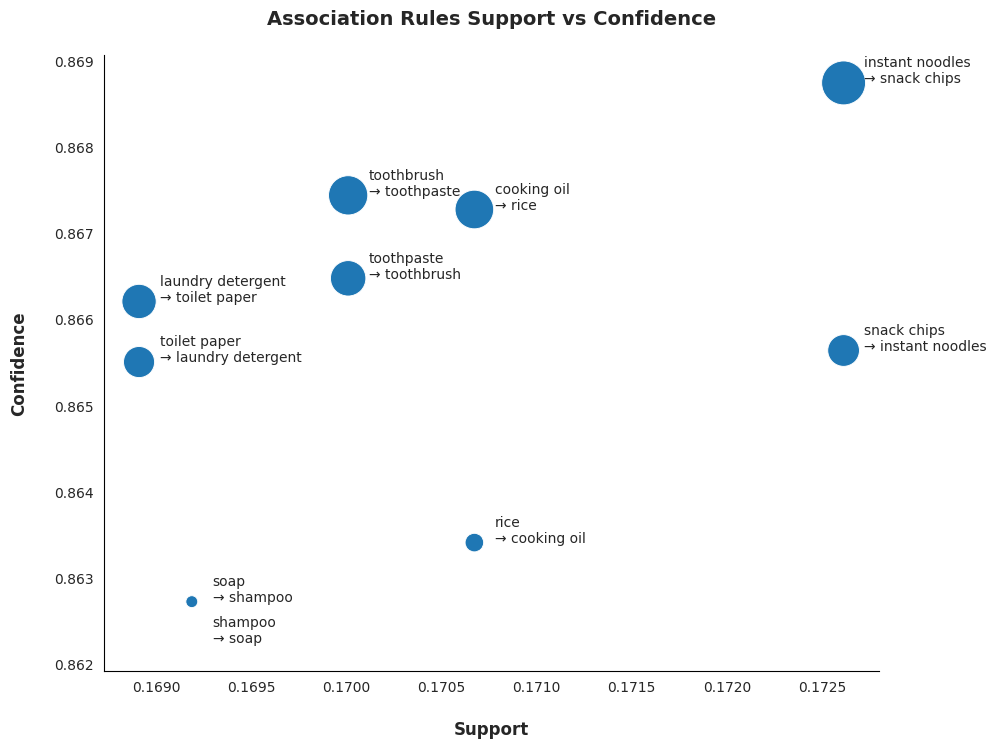

In [ ]:
# Create a scatterplot to visualize the relationship between support and confidence in association rules
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=sorted_rules, x=sorted_rules["support"], y=sorted_rules["confidence"], size="confidence", sizes=(0, 1000), legend=False)

# Annotate the points with labels
for i, row in sorted_rules.iterrows():
    # Convert frozenset to list, then to string and remove the frozenset and other unwanted characters
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    label = f"{antecedents}\n→ {consequents}" # \nSupport: {row['support']:.3f}, Confidence: {row['confidence']:.3f}"
    plt.annotate(label, (row['support'], row['confidence']), textcoords="offset points", xytext=(15, 0), ha='left', fontsize=10)
plt.title("Association Rules Support vs Confidence\n", fontsize=14, fontweight=700)
plt.xlabel("\nSupport", fontsize=12, fontweight=700)
plt.ylabel("Confidence\n", fontsize=12, fontweight=700)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().set_facecolor("white")
plt.show()

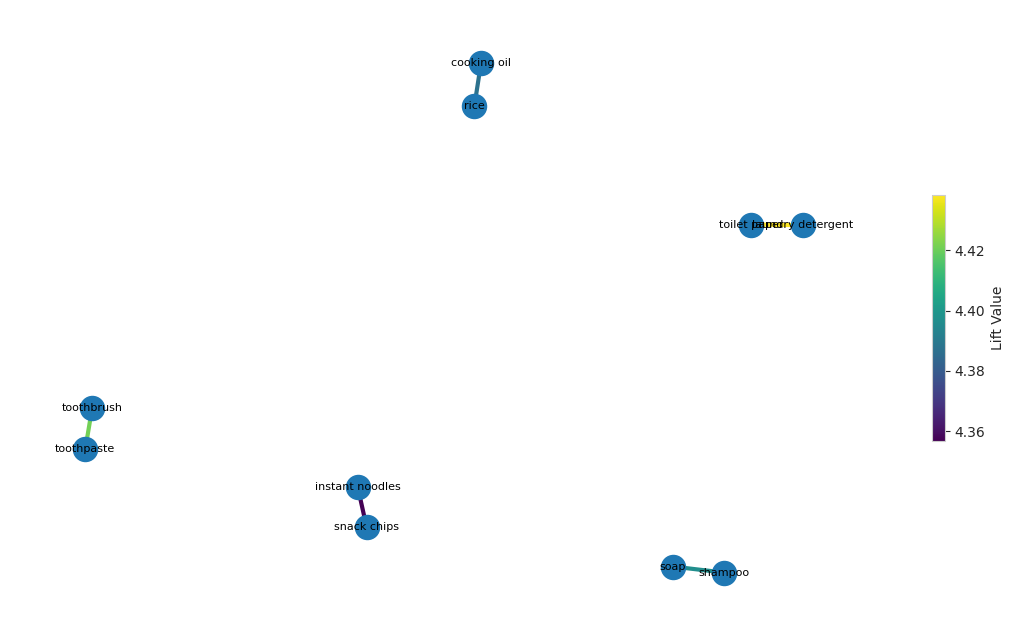

In [ ]:
# Create a network graph to visualize the characteristics of the association rules
import networkx as nx
import matplotlib.cm as cm
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore", category=Warning)

# Create a graph
G = nx.Graph()

for _, row in rules.iterrows():
    # Convert frozenset to string
    antecedents_str = ', '.join(list(row['antecedents']))
    consequents_str = ', '.join(list(row['consequents']))

    # Add nodes and edges with the string labels
    G.add_node(antecedents_str)
    G.add_node(consequents_str)
    G.add_edge(antecedents_str, consequents_str, weight=row['lift'])

colormap = get_cmap('viridis')
lift_values = [data["weight"] for _, _, data in G.edges(data=True)]
lift_min = min(lift_values)
lift_max = max(lift_values)
lift_norm = mcolors.Normalize(vmin=lift_min, vmax=lift_max)

# Define edge colors and widths based on lift values
edge_colors = lift_values
edge_widths = 3

# Plot the graph
fig, ax = plt.subplots(figsize=(14, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_color="azure", node_size=50)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw(G, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=colormap, edge_vmin=lift_min, edge_vmax=lift_max)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=lift_norm), ax=ax, shrink=0.4)
cbar.set_label("Lift Value")

plt.axis("off")
plt.show()

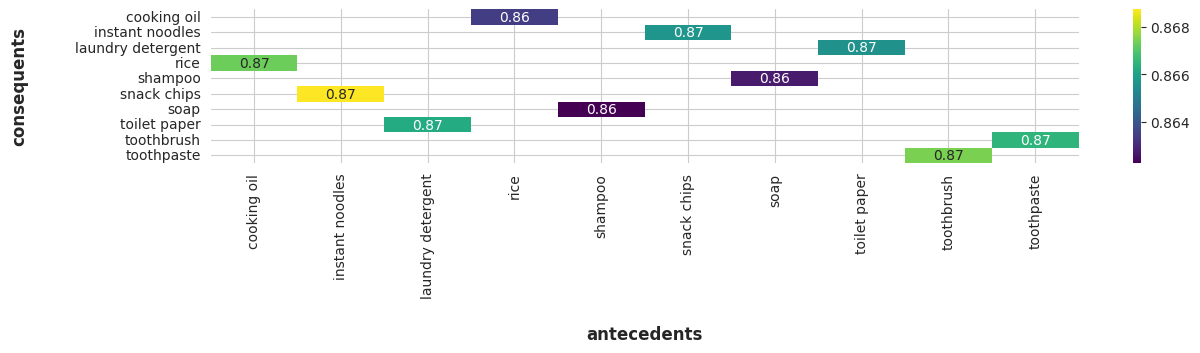

In [ ]:
# Create a heatmap to visualize the relationships between the antecedents and consequents
# Convert frozensets to strings and remove 'frozenset' from the representation
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Show frequency or strength of item associations
pivot_table = rules.pivot(index="consequents", columns="antecedents", values="confidence")
plt.figure(figsize=(14, 2))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.xlabel("\nantecedents", fontsize=12, fontweight=600)
plt.ylabel("consequents\n\n", fontsize=12, fontweight=600)
plt.gca().set_facecolor("white")
plt.show()

#### **Summary**
- Mineral water is a frequent consequent, suggesting it is commonly bought with many different items.<br><p>
- The strongest association rule based on confidence is (ground beef) -> (water) with a confidence of about 0.42, meaning that when ground beef is bought, water is also likely to be bought in 42% of the cases.<br><p>
- Milk, chocolate, and spaghetti also have strong associations with mineral water, with confidence levels above 32%.

## **Eclat Algorithm**
---
The Eclat (Equivalence Class Transformation) algorithm is another classic data mining algorithm used for mining frequent itemsets and discovering association rules in a database. It differs from the Apriori algorithm in terms of its methodology and efficiency. This page aims to provide an overview of the Eclat algorithm, its method, key parameters, advantages, limitations, and a basic implementation guide using Python.

The Eclat algorithm employs a depth-first search strategy to find frequent itemsets in a dataset. Instead of generating candidate itemsets as in Apriori, Eclat uses a **vertical data format to represent transactions**. It maintains an index structure, often called the **tidset**, which records the transactions in which each item appears. Eclat then recursively combines frequent itemsets by **intersecting their tidsets**. This approach scans the database only once, eliminates the need for candidate generation, making it efficient for mining frequent itemsets in large databases.

### **Key Parameters**
| **Parameter**             | **Description**                                                               |
|:--------------------------|:------------------------------------------------------------------------------|
| `min_support`             | User-defined threshold (a decimal between 0 and 1) that determines the minimum frequency at which an itemset must be present in the dataset to be considered 'frequent'.|
| `min_combination`    | User-defined minimum size of the itemsets to be considered frequent.<br><br>Setting a higher value for `min_combination` will result in the algorithm only considering larger itemsets as frequent. This can lead to discovering fewer but potentially more significant association rules or patterns. It filters out smaller itemsets, which may include common but less interesting associations.<br><br> Setting a lower value for `min_combination` allows the algorithm to find smaller frequent itemsets. This can lead to a larger number of discovered itemsets, including more specific and potentially noise patterns. It may be useful for finding fine-grained associations but can also result in a higher volume of results to analyze.|
| `max_combination`          | User-defined maximum size of the itemsets to be considered.<br><br>Setting a higher value for `max_combination` allows the algorithm to consider larger itemsets as frequent. This can be useful when you have prior knowledge that certain associations or patterns involve a larger number of items. However, it may also increase computational complexity and runtime.<br><br>Setting a lower value for `max_combination` limits the size of itemsets considered by the algorithm. It can lead to faster execution and a smaller number of results, focusing on more concise patterns. However, you might miss associations that involve larger sets of items.|

In [ ]:
# Install the pyECLAT library
!pip install pyECLAT

In [ ]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/content/retail.csv", header=None)
df.head()

,0,1,2
0,dishwashing liquid,toothbrush,NaN
1,laundry detergent,toilet paper,NaN
2,cooking oil,rice,hand sanitizer
3,shampoo,soap,bread
4,laundry detergent,toilet paper,NaN


In [ ]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 101000 transactions and each transaction has a maximum of 3 items or less.


In [ ]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,dishwashing liquid
1,1,toothbrush
2,2,laundry detergent
3,2,toilet paper
4,3,cooking oil
5,3,rice
6,3,hand sanitizer
7,4,shampoo
8,4,soap
9,4,bread


In [ ]:
# Find the top 30 most frequent items
top_items = df_txn['Item'].value_counts().reset_index()

# Convert the top 30 items into DataFrame and sort by item count in descending order
df_top_items = pd.DataFrame(top_items)
df_top_items.columns = ['Item', 'Count']

# Calculate the percentage of transactions for each item
total_transactions = len(df)
df_top_items['% Count'] = (df_top_items['Count']*100 / total_transactions).round(2)

# Display the results
df_top_items.style.background_gradient(cmap='Blues')

,Item,Count,% Count
0,snack chips,20140,19.940000
1,instant noodles,20068,19.870000
2,rice,19965,19.770000
3,cooking oil,19876,19.680000
4,shampoo,19818,19.620000
5,toothpaste,19817,19.620000
6,soap,19807,19.610000
7,toothbrush,19795,19.600000
8,toilet paper,19711,19.520000
9,laundry detergent,19695,19.500000


In [ ]:
# Import the pyECLAT library
from pyECLAT import ECLAT

# Initiate an Eclat instance and load transactions DataFrame to the instance
eclat = ECLAT(data=df, verbose=True)

# Generate a binary dataframe
eclat.df_bin.head()

100%|██████████| 21/21 [00:00<00:00, 56.19it/s]


,cooking oil,coffee,bottled water,toilet paper,dishwashing liquid,rice,toothpaste,tea,hand sanitizer,toothbrush,snack chips,bread,salt,shampoo,soap,deodorant,sugar,laundry detergent,facial tissue,body lotion,instant noodles
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Display a list with all the names of the different items
unique_item_list = eclat.uniq_
print(unique_item_list)

['cooking oil', 'coffee', 'bottled water', 'toilet paper', 'dishwashing liquid', 'rice', 'toothpaste', 'tea', nan, 'hand sanitizer', 'toothbrush', 'snack chips', 'bread', 'salt', 'shampoo', 'soap', 'deodorant', 'sugar', 'laundry detergent', 'facial tissue', 'body lotion', 'instant noodles']


In [ ]:
# Generate frequent itemsets
# Applying Eclat algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent and a frequent itemset should contain at least 1 item and a maximum of 3 items
min_support_threshold = 0.04
min_combination = 2
max_combination = 3

get_ECLAT_indexes, get_ECLAT_supports = eclat.fit(min_support = min_support_threshold, min_combination = min_combination, max_combination = max_combination, separator=' & ', verbose=True)

# Display results in a dataframe
result = pd.DataFrame(get_ECLAT_supports.items(),columns=['Item', 'Support'])
result = result.sort_values(by=['Support'], ascending=False).reset_index(drop=True)
result

Combination 2 by 2


45it [00:02, 18.46it/s]


Combination 3 by 3


120it [00:03, 30.94it/s]


,Item,Support
0,snack chips & instant noodles,0.172614
1,cooking oil & rice,0.170673
2,toothpaste & toothbrush,0.170010
3,shampoo & soap,0.169188
4,toilet paper & laundry detergent,0.168911


## **FP-Growth Algorithm**
---
The FP-growth (Frequent Pattern growth) algorithm is another popular algorithm for discovering frequent itemsets and association rules. It offers advantages over both Apriori and Eclat in terms of efficiency and scalability. This page aims to provide an overview of the FP-growth algorithm, its method, key parameters, advantages, limitations, and a basic implementation guide using Python.


The FP-growth algorithm employs a divide-and-conquer strategy to discover frequent itemsets. It constructs a tree-like data structure known as the **FP-tree (Frequent Pattern tree)** from the transaction database. This tree structure compactly represents the frequent patterns and their support counts. FP-growth then **recursively mines the tree to find frequent itemsets**. Unlike Apriori, FP-growth does not generate candidate itemsets explicitly, which makes it faster and more memory-efficient, especially for large datasets. In addition, there is also a **header table**, alongside the FP-tree that stores pointers to the first occurrence of each item in the FP-tree. This speeds up the process of finding frequent itemsets.

### **Key Parameters**
| **Parameter**             | **Description**                                                               |
|:--------------------------|:------------------------------------------------------------------------------|
| `min_support`             | This is the user-defined threshold (a decimal between 0 and 1) that determines the minimum frequency at which an itemset must be present in the dataset to be considered 'frequent'.|
| `confidence_threshold`    | This is the user-defined minimum level of confidence that an association rule must exceed to be considered significant.
| `lift_threshold`          | This is the user-defined minimum lift value (typically >1) focusing on rules that have a positive relationship between the antecedent and consequent.|


In [ ]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/content/retail.csv", header=None, index_col=None, names=[f"Item_{i}" for i in range(1, 21)])
df.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,dishwashing liquid,toothbrush,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,laundry detergent,toilet paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cooking oil,rice,hand sanitizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,shampoo,soap,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,laundry detergent,toilet paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 101000 transactions and each transaction has a maximum of 20 items or less.


In [ ]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,dishwashing liquid
1,1,toothbrush
2,2,laundry detergent
3,2,toilet paper
4,3,cooking oil
5,3,rice
6,3,hand sanitizer
7,4,shampoo
8,4,soap
9,4,bread


In [ ]:
# Perform one hot encoding using TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

# Create a TransactionEncoder
te = TransactionEncoder()

# Fit and transform the transaction data
te_array = te.fit(txns).transform(txns)

# Extract the column names
te_columns = te.columns_

# Create a DataFrame from the one-hot encoded array
df1 = pd.DataFrame(te_array, columns=te.columns_)

# Display the results
df1.head()

,body lotion,bottled water,bread,coffee,cooking oil,deodorant,dishwashing liquid,facial tissue,hand sanitizer,instant noodles,laundry detergent,rice,salt,shampoo,snack chips,soap,sugar,tea,toilet paper,toothbrush,toothpaste
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Find the top most frequent items
top_items = df_txn['Item'].value_counts().reset_index()

# Convert the top items into DataFrame and sort by item count in descending order
df_top_items = pd.DataFrame(top_items)
df_top_items.columns = ['Item', 'Count']

# Calculate the percentage of transactions for each item
total_transactions = len(df)
df_top_items['% Count'] = (df_top_items['Count']*100 / total_transactions).round(2)

# Display the results
df_top_items.style.background_gradient(cmap='Blues')

,Item,Count,% Count
0,snack chips,20140,19.940000
1,instant noodles,20068,19.870000
2,rice,19965,19.770000
3,cooking oil,19876,19.680000
4,shampoo,19818,19.620000
5,toothpaste,19817,19.620000
6,soap,19807,19.610000
7,toothbrush,19795,19.600000
8,toilet paper,19711,19.520000
9,laundry detergent,19695,19.500000


### **MLXTEND**

In [ ]:
# Generate frequent itemsets
from mlxtend.frequent_patterns import fpgrowth

# Applying fpgrowth algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent
min_support_threshold = 0.04
fp_frequent_itemsets = fpgrowth(df1, min_support=min_support_threshold, use_colnames=True)
fp_frequent_itemsets

,support,itemsets
0,0.195990,(toothbrush)
1,0.195158,(toilet paper)
2,0.195000,(laundry detergent)
3,0.197673,(rice)
4,0.196792,(cooking oil)
5,0.196218,(shampoo)
6,0.196109,(soap)
7,0.196208,(toothpaste)
8,0.199406,(snack chips)
9,0.198693,(instant noodles)


The most frequent individual items are mineral water (23.84%), eggs (17.97%), and spaghetti (17.41%). There are also five frequent itemsets with two items e.g. (chocolate, mineral water) with a support of 5.27%, indicating that these items often appear together in transactions.

In [ ]:
# Generate association rules from the frequent itemsets assuming the likelihood of purchasing the antecedent, followed by the consequent has to be at least 30% to be considered significant or interesting
from mlxtend.frequent_patterns import association_rules
confidence_threshold = 0.3
rules = association_rules(fp_frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

# Sorting rules by confidence, support, and lift
sorted_rules = rules.sort_values(['confidence', 'support', 'lift'], ascending=[False, False, False])
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(instant noodles),(snack chips),0.198693,0.199406,0.172614,0.868746,4.356672,1.0,0.132993,6.099591,0.961513,0.765522,0.836055,0.867193
1,(toothbrush),(toothpaste),0.195990,0.196208,0.170010,0.867441,4.421031,1.0,0.131555,6.063668,0.962436,0.765162,0.835083,0.866960
4,(cooking oil),(rice),0.196792,0.197673,0.170673,0.867277,4.387427,1.0,0.131773,6.045127,0.961241,0.762642,0.834578,0.865344
0,(toothpaste),(toothbrush),0.196208,0.195990,0.170010,0.866478,4.421031,1.0,0.131555,6.021566,0.962697,0.765162,0.833930,0.866960
2,(laundry detergent),(toilet paper),0.195000,0.195158,0.168911,0.866210,4.438495,1.0,0.130855,6.015694,0.962358,0.763448,0.833768,0.865858
9,(snack chips),(instant noodles),0.199406,0.198693,0.172614,0.865641,4.356672,1.0,0.132993,5.963903,0.962369,0.765522,0.832325,0.867193
3,(toilet paper),(laundry detergent),0.195158,0.195000,0.168911,0.865507,4.438495,1.0,0.130855,5.985422,0.962548,0.763448,0.832927,0.865858
5,(rice),(cooking oil),0.197673,0.196792,0.170673,0.863411,4.387427,1.0,0.131773,5.880472,0.962296,0.762642,0.829946,0.865344
7,(soap),(shampoo),0.196109,0.196218,0.169188,0.862725,4.396773,1.0,0.130708,5.855283,0.961026,0.758220,0.829214,0.862486
6,(shampoo),(soap),0.196218,0.196109,0.169188,0.862246,4.396773,1.0,0.130708,5.835719,0.961157,0.758220,0.828642,0.862486


Customers who purchase ground beef are 41.66% likely to also purchase mineral water and this association is supported by a lift value of 1.75, which signifies that these items are frequently bought together. Similiar observations were found for some other items - milk, spaghetti, and chocolate, in association with mineral water. To visualize association rules, we can leverage the scatter plots, network graphs, heatmaps, and bar charts to understand their distribution within the dataset and their strength of association.

### **FPGROWTH_PY**

In [ ]:
# Install fpgrowth library
!pip install fpgrowth_py

In [ ]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/content/retail.csv", header=None, index_col=None, names=[f"Item_{i}" for i in range(1, 21)])
df.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,dishwashing liquid,toothbrush,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,laundry detergent,toilet paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cooking oil,rice,hand sanitizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,shampoo,soap,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,laundry detergent,toilet paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 101000 transactions and each transaction has a maximum of 20 items or less.


In [ ]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,dishwashing liquid
1,1,toothbrush
2,2,laundry detergent
3,2,toilet paper
4,3,cooking oil
5,3,rice
6,3,hand sanitizer
7,4,shampoo
8,4,soap
9,4,bread


In [ ]:
# Generate frequent itemsets
from fpgrowth_py import fpgrowth

# Applying fpgrowth algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent
# Generate association rules from the frequent itemsets assuming the likelihood of purchasing the antecedent, followed by the consequent has to be at least 30% to be considered significant or interesting
frequent_itemsets, rules = fpgrowth(txns, minSupRatio=0.04, minConf=0.3)
print(frequent_itemsets)
print(f"\n{rules}")

[{'laundry detergent'}, {'laundry detergent', 'toilet paper'}, {'toilet paper'}, {'toothbrush'}, {'toothpaste', 'toothbrush'}, {'soap'}, {'shampoo', 'soap'}, {'toothpaste'}, {'shampoo'}, {'cooking oil'}, {'cooking oil', 'rice'}, {'rice'}, {'instant noodles'}, {'instant noodles', 'snack chips'}, {'snack chips'}]

[[{'laundry detergent'}, {'toilet paper'}, 0.8662096978928662], [{'toilet paper'}, {'laundry detergent'}, 0.865506569935569], [{'toothpaste'}, {'toothbrush'}, 0.8664782762274814], [{'toothbrush'}, {'toothpaste'}, 0.8674412730487497], [{'shampoo'}, {'soap'}, 0.8622464426279141], [{'soap'}, {'shampoo'}, 0.8627252991366688], [{'cooking oil'}, {'rice'}, 0.867277118132421], [{'rice'}, {'cooking oil'}, 0.8634109691960932], [{'instant noodles'}, {'snack chips'}, 0.8687462627067969], [{'snack chips'}, {'instant noodles'}, 0.8656405163853029]]


In [ ]:
# Convert each frequent_itemsets set to a string
freq_itemsets_str = [', '.join(list(itemset)) for itemset in frequent_itemsets]

# Create DataFrame
freq_itemsets_df = pd.DataFrame(freq_itemsets_str, columns=['Itemset'])
freq_itemsets_df

,Itemset
0,laundry detergent
1,"laundry detergent, toilet paper"
2,toilet paper
3,toothbrush
4,"toothpaste, toothbrush"
5,soap
6,"shampoo, soap"
7,toothpaste
8,shampoo
9,cooking oil


In [ ]:
# Convert rules to DataFrame
rules_df = pd.DataFrame(rules, columns=['Antecedent', 'Consequent', 'Confidence'])
rules_df = rules_df.sort_values(by="Confidence", ascending =False).reset_index(drop=True)
rules_df

,Antecedent,Consequent,Confidence
0,{instant noodles},{snack chips},0.868746
1,{toothbrush},{toothpaste},0.867441
2,{cooking oil},{rice},0.867277
3,{toothpaste},{toothbrush},0.866478
4,{laundry detergent},{toilet paper},0.866210
5,{snack chips},{instant noodles},0.865641
6,{toilet paper},{laundry detergent},0.865507
7,{rice},{cooking oil},0.863411
8,{soap},{shampoo},0.862725
9,{shampoo},{soap},0.862246
